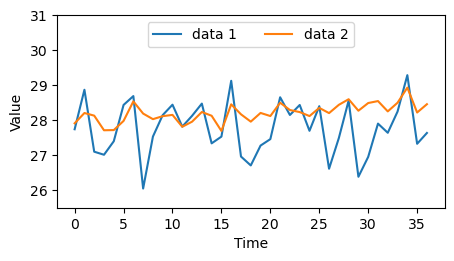

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import netCDF4 as nc
import mpl_toolkits.basemap as bm
from scipy import stats

data1 = np.genfromtxt("../datasets/sampledata.txt")
data2 = np.genfromtxt("../datasets/sampledata2.txt")

# plot
plt.figure(figsize=(5,2.5))
plt.plot(data1, label="data 1")
plt.plot(data2, label="data 2")
plt.xlabel("Time")
plt.ylabel("Value")
plt.ylim((25.5,31))
plt.legend(ncol=2, loc="upper center")

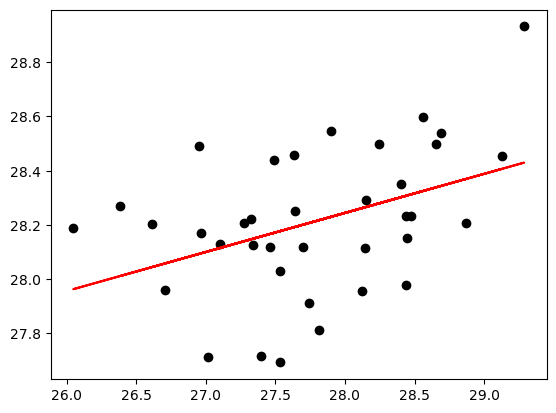

In [2]:
plt.plot(data1, data2, 'ko')
[slope, intercept] = np.polyfit(data1, data2, 1)
func = lambda x: slope*x + intercept
mymodel = list(map(func, data1))
plt.plot(data1, mymodel, 'r')

## **Trend Script**
### **Trend script for temperature**

Text(0.0, 1.0, 'SAT Trends (DegC/decade)')

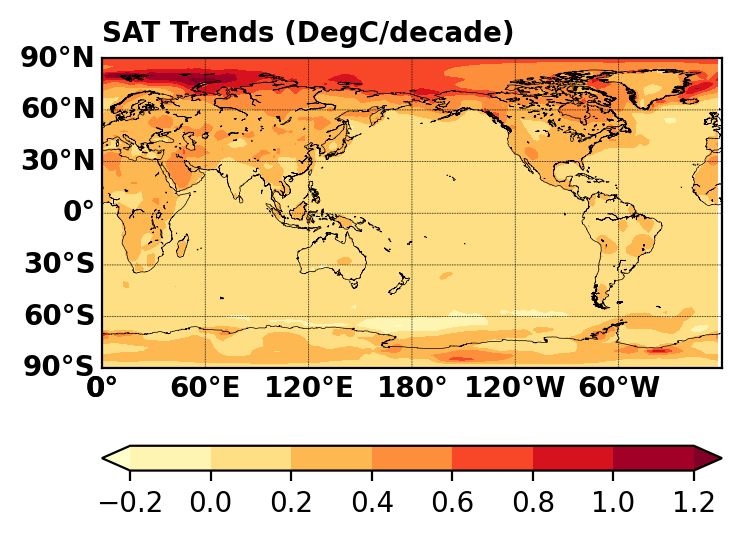

In [4]:
file = "../datasets/era5_tas_1959_2021_25deg.nc"

f1= nc.Dataset(file)
lon=f1.variables['lon'][:]
lat=f1.variables['lat'][:]
var = f1.variables['t2m'][:,:,:]
nt, nlat, nlon = var.shape
ngrd = nlon*nlat
var_grd  = var.reshape((nt, ngrd), order='F') 
x        = np.linspace(1,nt,nt)#.reshape((nt,1))
var_rate = np.empty((ngrd,1))
var_rate[:,:] = np.nan
######trend calculation####
for i in range(ngrd):
    y = var_grd[:,i]
    if(not np.ma.is_masked(y)):
        z = np.polyfit(x, y, 1)
        var_rate[i,0] = z[0]*120.0
#120 is multpilied for decade
var_rate = var_rate.reshape((nlat,nlon), order='F')
#################

lonx, latx = np.meshgrid(lon, lat)
lat1=np.min(lat)
lat2=np.max(lat)
lon1=np.min(lon)
lon2=np.max(lon)
[lonall, latall] = np.meshgrid(lon[:], lat[:])
plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')

m = bm.Basemap(projection='cyl',llcrnrlat=-90, llcrnrlon=0,urcrnrlat=90, urcrnrlon=360, lon_0=0, lat_0=0, resolution='l')

m.drawcoastlines(linewidth=0.25)                # Draw coastal boundaries
# m.fillcontinents(color='white',lake_color='white',zorder=2)
# m.fillcontinents(color='gray',lake_color='white',zorder=2)

x, y = m(lonall, latall)

#levels=[-40,-35,-30, -25, -20, -15,-10,-5,0, 5,10,15, 20, 25, 30, 35,40]
# levels=[0, 2,5,8,10,12,15]
#jjj=m.contourf(x,y,sttas[:,:],levels=levels,  extend = 'both', cmap=plt.cm.RdBu_r)
jjj=m.contourf(x,y,var_rate.squeeze(),  extend = 'both', cmap=plt.cm.YlOrRd)

m.colorbar(jjj,location='bottom',size="8%", pad='25%')
parallels = np.arange(-90,91,30.) # make latitude lines 
meridians = np.arange(-180,180,60.) # make longitude lines 
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold',linewidth=0.3)

plt.title("SAT Trends (DegC/decade)", loc='left',fontsize=10,weight='bold')

### **Trend script for sea surface temperature SST**

Text(0.0, 1.0, 'SST Trends (DegC/decade)')

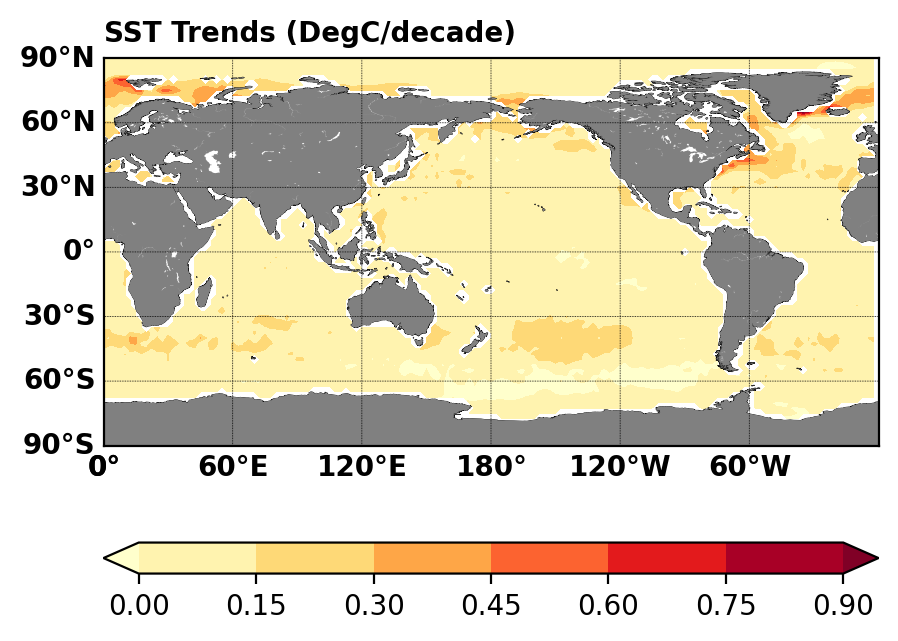

In [5]:
file = "../datasets/era5_sst_1959_2021_25deg.nc"

f1= nc.Dataset(file)
lon=f1.variables['lon'][:]
lat=f1.variables['lat'][:]
var = f1.variables['sst'][:,:,:]
nt, nlat, nlon = var.shape
ngrd = nlon*nlat
var_grd  = var.reshape((nt, ngrd), order='F') 
x        = np.linspace(1,nt,nt)#.reshape((nt,1))
var_rate = np.empty((ngrd,1))
var_rate[:,:] = np.nan
######trend calculation####
for i in range(ngrd):
    y = var_grd[:,i]
    if(not np.ma.is_masked(y)):
        z = np.polyfit(x, y, 1)
        var_rate[i,0] = z[0]*120.0
#120 is multpilied for decade
var_rate = var_rate.reshape((nlat,nlon), order='F')
#################

lonx, latx = np.meshgrid(lon, lat)
lat1=np.min(lat)
lat2=np.max(lat)
lon1=np.min(lon)
lon2=np.max(lon)
[lonall, latall] = np.meshgrid(lon[:], lat[:])
plt.figure(num=None, figsize=(5, 5), dpi=200, facecolor='w', edgecolor='k')

m = bm.Basemap(projection='cyl',llcrnrlat=-90, llcrnrlon=0,urcrnrlat=90, urcrnrlon=360, lon_0=0, lat_0=0, resolution='l')

m.drawcoastlines(linewidth=0.25)                # Draw coastal boundaries
# m.fillcontinents(color='white',lake_color='white',zorder=2)
m.fillcontinents(color='gray',lake_color='white',zorder=2)

x, y = m(lonall, latall)

#levels=[-40,-35,-30, -25, -20, -15,-10,-5,0, 5,10,15, 20, 25, 30, 35,40]
# levels=[0, 2,5,8,10,12,15]
#jjj=m.contourf(x,y,sttas[:,:],levels=levels,  extend = 'both', cmap=plt.cm.RdBu_r)
jjj=m.contourf(x,y,var_rate.squeeze(),  extend = 'both', cmap=plt.cm.YlOrRd)

m.colorbar(jjj,location='bottom',size="8%", pad='25%')
parallels = np.arange(-90,91,30.) # make latitude lines 
meridians = np.arange(-180,180,60.) # make longitude lines 
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold',linewidth=0.3)

plt.title("SST Trends (DegC/decade)", loc='left',fontsize=10,weight='bold')

### **Trend script for Precipitation**

Text(0.0, 1.0, 'Precp Trends (mm/decade)')

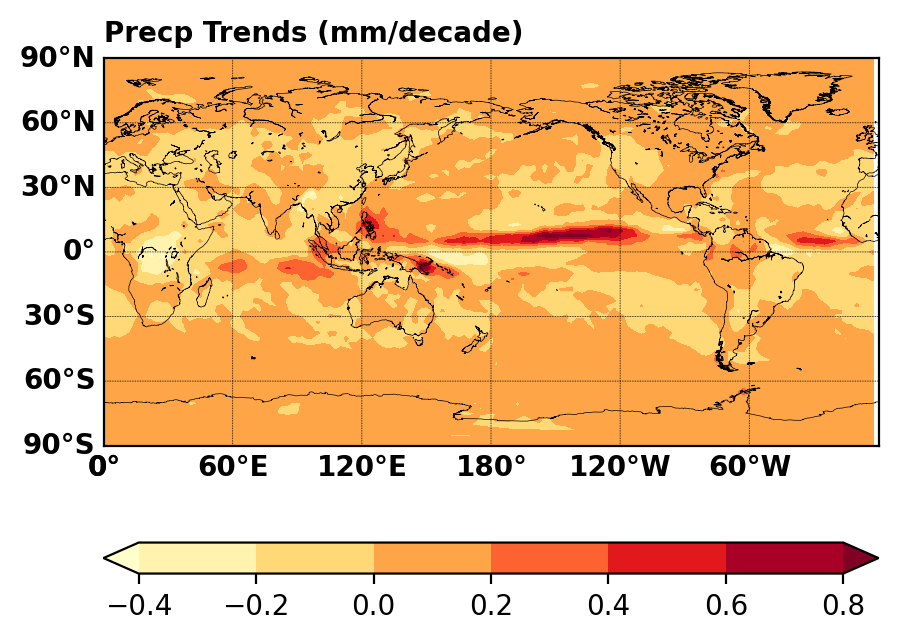

In [6]:
file = "../datasets/era5_precp_1959_2021_25deg.nc"

f1= nc.Dataset(file)
lon=f1.variables['lon'][:]
lat=f1.variables['lat'][:]
var = f1.variables['tp'][:,:,:]
nt, nlat, nlon = var.shape
ngrd = nlon*nlat
var_grd  = var.reshape((nt, ngrd), order='F') 
x        = np.linspace(1,nt,nt)#.reshape((nt,1))
var_rate = np.empty((ngrd,1))
var_rate[:,:] = np.nan
######trend calculation####
for i in range(ngrd):
    y = var_grd[:,i]
    if(not np.ma.is_masked(y)):
        z = np.polyfit(x, y, 1)
        var_rate[i,0] = z[0]*120.0
#120 is multpilied for decade
var_rate = var_rate.reshape((nlat,nlon), order='F')
#################

lonx, latx = np.meshgrid(lon, lat)
lat1=np.min(lat)
lat2=np.max(lat)
lon1=np.min(lon)
lon2=np.max(lon)
[lonall, latall] = np.meshgrid(lon[:], lat[:])
plt.figure(num=None, figsize=(5, 5), dpi=200, facecolor='w', edgecolor='k')

m = bm.Basemap(projection='cyl',llcrnrlat=-90, llcrnrlon=0,urcrnrlat=90, urcrnrlon=360, lon_0=0, lat_0=0, resolution='l')

m.drawcoastlines(linewidth=0.25)                # Draw coastal boundaries
# m.fillcontinents(color='white',lake_color='white',zorder=2)
# m.fillcontinents(color='gray',lake_color='white',zorder=2)

x, y = m(lonall, latall)

#levels=[-40,-35,-30, -25, -20, -15,-10,-5,0, 5,10,15, 20, 25, 30, 35,40]
# levels=[0, 2,5,8,10,12,15]
#jjj=m.contourf(x,y,sttas[:,:],levels=levels,  extend = 'both', cmap=plt.cm.RdBu_r)
jjj=m.contourf(x,y,var_rate.squeeze(),  extend = 'both', cmap=plt.cm.YlOrRd)

m.colorbar(jjj,location='bottom',size="8%", pad='25%')
parallels = np.arange(-90,91,30.) # make latitude lines 
meridians = np.arange(-180,180,60.) # make longitude lines 
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold',linewidth=0.3)

plt.title("Precp Trends (mm/decade)", loc='left',fontsize=10,weight='bold')